# Machine Vision Lab - Assignment 2
> Name - Ojas Patil
>
> Register Number - 21BAI1106

### Task 1: Geometric Rectification of Satellite Imagery

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

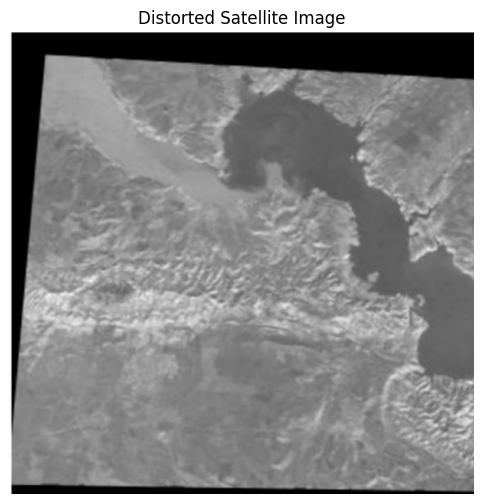

In [102]:
image_path = '/content/satellite2.png'
distorted_image = cv2.imread(image_path)

display_image(distorted_image, "Distorted Satellite Image")

In [103]:
# Define Ground Control Points (GCPs)
distorted_gcp = np.array([[110, 200], [400, 300], [600, 800], [900, 1000]], dtype=np.float32)
rectified_gcp = np.array([[100, 200], [400, 300], [600, 800], [900, 1000]], dtype=np.float32)

In [104]:
transformation_matrix = cv2.getPerspectiveTransform(distorted_gcp, rectified_gcp)
print("Transformation Matrix: \n", transformation_matrix)

Transformation Matrix: 
 [[ 9.94528169e-01  8.79933137e-02 -2.45958158e+01]
 [-6.59492778e-02  1.14033484e+00 -1.60106564e+01]
 [-1.57364118e-04  2.06597540e-04  1.00000000e+00]]


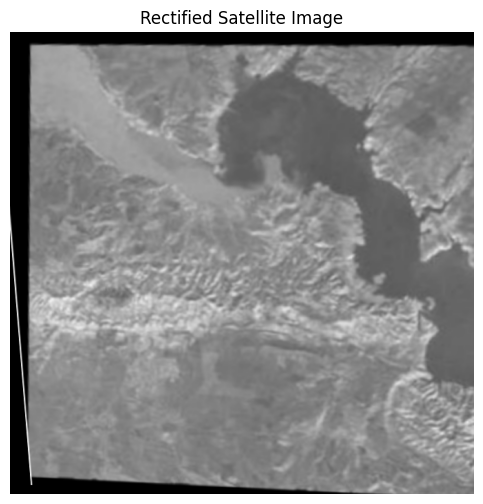

In [105]:
height, width = distorted_image.shape[:2]
rectified_image = cv2.warpPerspective(distorted_image, transformation_matrix, (width, height))
display_image(rectified_image, "Rectified Satellite Image")

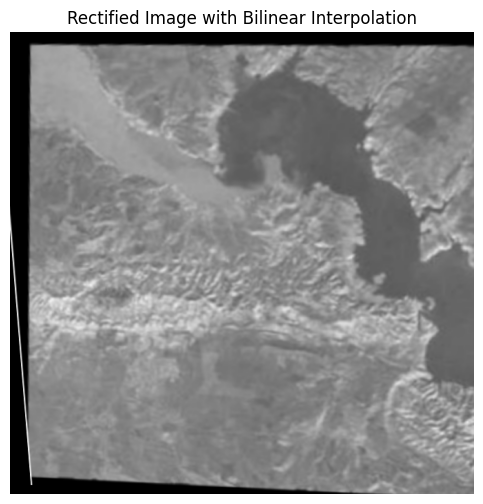

In [106]:
rectified_image_bilinear = cv2.warpPerspective(distorted_image, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)
display_image(rectified_image_bilinear, "Rectified Image with Bilinear Interpolation")

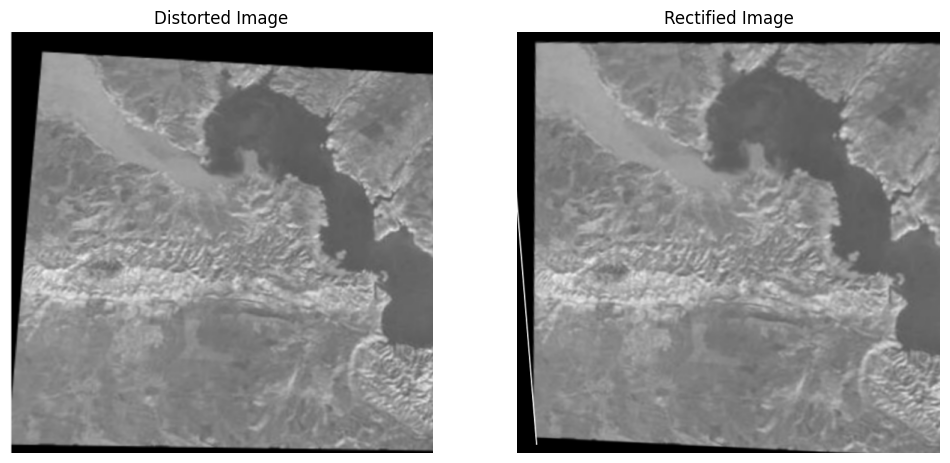

In [107]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_image_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Image')
plt.axis('off')

plt.show()

#### Challenges and Learnings
Challenges:
1. Selecting the ground control points (GCPs) accurately was crucial for good rectification, and small errors could lead to noticeable distortions.
2. Bilinear interpolation requires more computation but provides smoother and more accurate resampling compared to nearest neighbor interpolation.

Learnings:
1. Using transformation matrices to map coordinates between images is a powerful method for geometric rectification.
2. Bilinear interpolation helped preserve the visual quality of the rectified image, reducing pixelation and making transitions smoother.

### Task 2: Medical Image Rectification

In [108]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

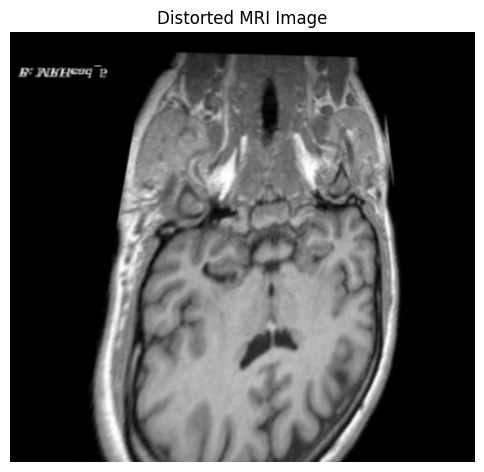

In [109]:
image_path = '/content/brain_mri1.png'
distorted_mri = cv2.imread(image_path)

display_image(distorted_mri, "Distorted MRI Image")

In [110]:
distorted_key_points = np.array([[120, 270], [450, 300], [600, 500], [800, 700]], dtype=np.float32)

reference_key_points = np.array([[120, 220], [450, 300], [600, 500], [800, 700]], dtype=np.float32)

In [111]:
# Compute the transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(distorted_key_points, reference_key_points)
print("Transformation Matrix: \n", transformation_matrix)


Transformation Matrix: 
 [[ 8.12369990e-01  2.74857856e-01 -3.35321037e+01]
 [-3.06938474e-02  1.10520963e+00 -4.14228262e+01]
 [-7.80289373e-04  9.07409976e-04  1.00000000e+00]]


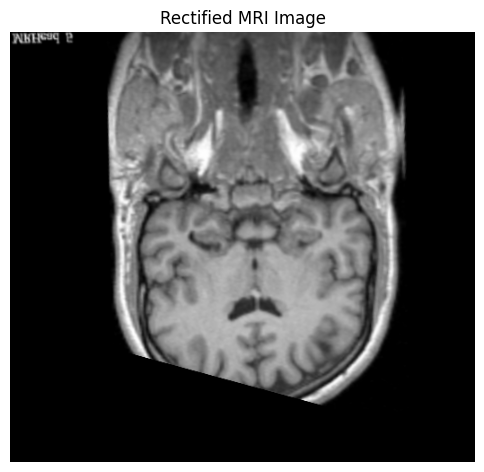

In [112]:
height, width = distorted_mri.shape[:2]
rectified_mri = cv2.warpPerspective(distorted_mri, transformation_matrix, (width, height))

display_image(rectified_mri, "Rectified MRI Image")

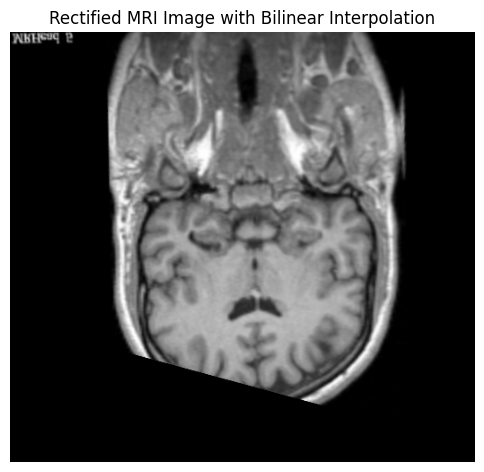

In [113]:
# Apply bilinear interpolation during transformation
rectified_mri_bilinear = cv2.warpPerspective(distorted_mri, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)
display_image(rectified_mri_bilinear, "Rectified MRI Image with Bilinear Interpolation")

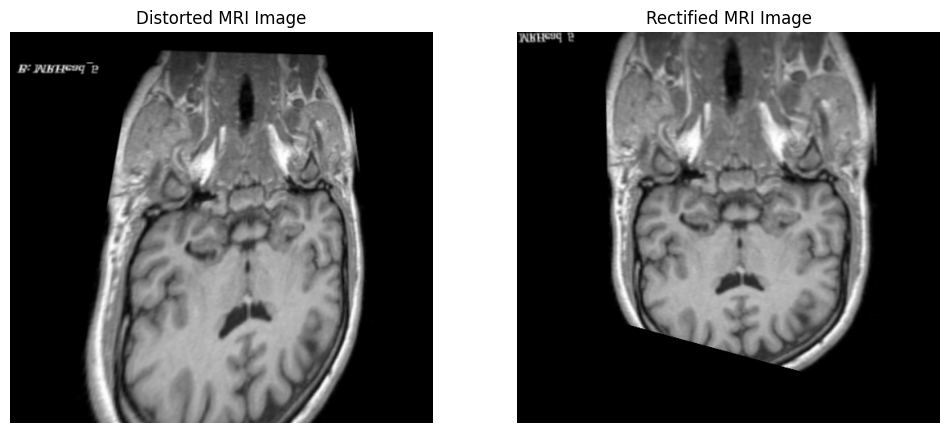

In [114]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_mri, cv2.COLOR_BGR2RGB))
plt.title('Distorted MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_mri_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified MRI Image')
plt.axis('off')

plt.show()

### Task 3: Drone Image Rectification

In [173]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

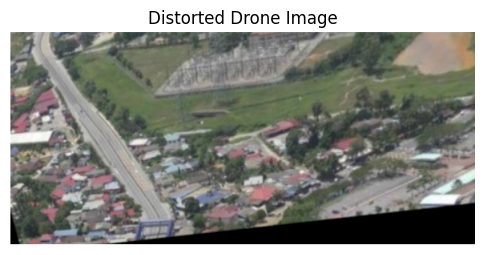

In [175]:
image_path = '/content/drone1.png'
distorted_drone_image = cv2.imread(image_path)


display_image(distorted_drone_image, "Distorted Drone Image")

In [195]:
distorted_control_points = np.array([[145, 350], [450, 450], [600, 750], [850, 950]], dtype=np.float32)
rectified_control_points = np.array([[150, 350], [450, 450], [600, 750], [850, 950]], dtype=np.float32)

In [196]:
transformation_matrix = cv2.getPerspectiveTransform(distorted_control_points, rectified_control_points)
print("Transformation Matrix: \n", transformation_matrix)

Transformation Matrix: 
 [[ 1.07275427e+00 -2.90274684e-01  7.38307350e+01]
 [ 2.41276912e-01  5.41945063e-01  7.34966592e+01]
 [ 5.19673348e-04 -6.38455828e-04  1.00000000e+00]]


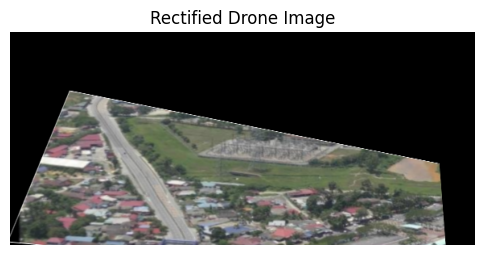

In [197]:
height, width = distorted_drone_image.shape[:2]
rectified_drone_image = cv2.warpPerspective(distorted_drone_image, transformation_matrix, (width, height))

display_image(rectified_drone_image, "Rectified Drone Image")

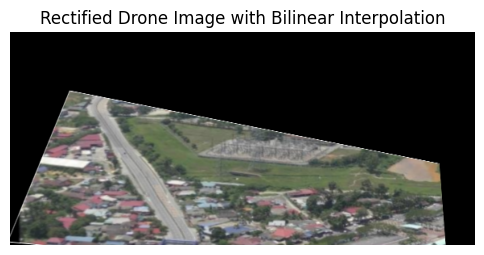

In [198]:
rectified_drone_bilinear = cv2.warpPerspective(distorted_drone_image, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)

display_image(rectified_drone_bilinear, "Rectified Drone Image with Bilinear Interpolation")

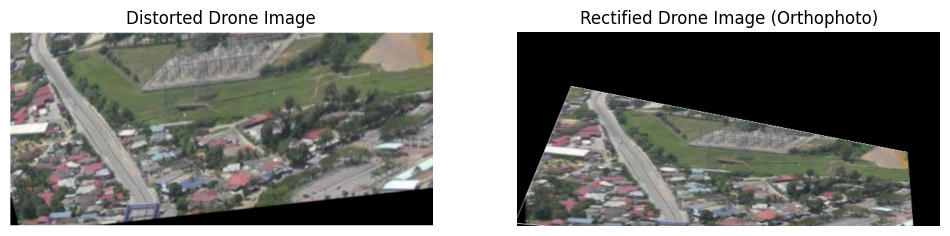

In [199]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_drone_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Drone Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_drone_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Drone Image (Orthophoto)')
plt.axis('off')

plt.show()

#### Challenges and Learnings
"""
Challenges:
1. Accurately marking the control points was challenging due to slight variations in field features captured from different angles.
2. Ensuring proper alignment between the distorted image and the reference coordinates required trial and error.

Learnings:
1. Bilinear interpolation is crucial in ensuring a smooth transition between pixels during rectification, especially in large drone images.
2. The rectified orthophoto provides a more accurate representation of the agricultural field, aiding in better analysis.
"""


### Task 4: Historical Photo Restoration

In [ ]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

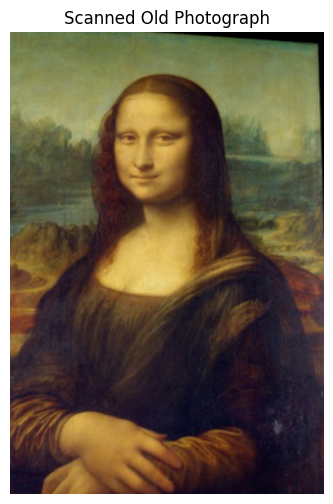

In [206]:
image_path = '/content/historic1.png'  # Update with the actual path to the photograph
distorted_photo = cv2.imread(image_path)

display_image(distorted_photo, "Scanned Old Photograph")

In [220]:
distorted_photo_points = np.array([[100, 200], [380, 280], [560, 480], [730, 680]], dtype=np.float32)

reference_photo_points = np.array([[105, 200], [380, 280], [560, 480], [730, 680]], dtype=np.float32)

In [221]:
transformation_matrix = cv2.getPerspectiveTransform(distorted_photo_points, reference_photo_points)
print("Transformation Matrix: \n", transformation_matrix)

Transformation Matrix: 
 [[ 9.50821409e-01  2.67207209e-02  5.33280152e+00]
 [-2.06162437e-02  9.99987536e-01  3.50999651e+00]
 [-1.06571272e-04  8.94326170e-05  1.00000000e+00]]


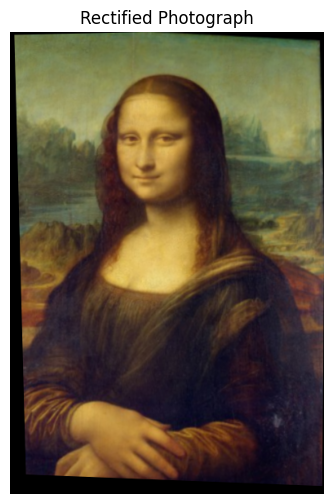

In [222]:
height, width = distorted_photo.shape[:2]
rectified_photo = cv2.warpPerspective(distorted_photo, transformation_matrix, (width, height))

display_image(rectified_photo, "Rectified Photograph")

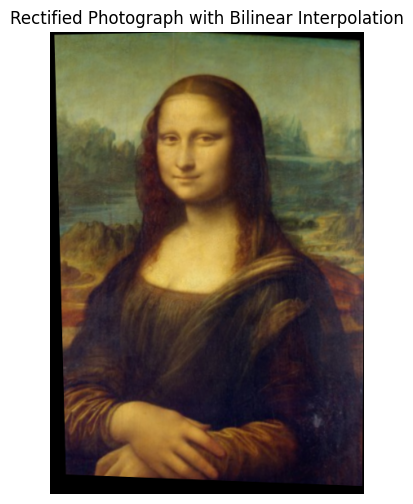

In [223]:
rectified_photo_bilinear = cv2.warpPerspective(distorted_photo, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)

display_image(rectified_photo_bilinear, "Rectified Photograph with Bilinear Interpolation")

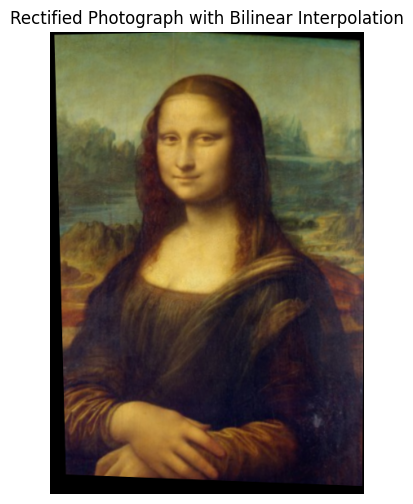

In [224]:
rectified_photo_bilinear = cv2.warpPerspective(distorted_photo, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)

display_image(rectified_photo_bilinear, "Rectified Photograph with Bilinear Interpolation")

(-0.5, 384.5, 566.5, -0.5)

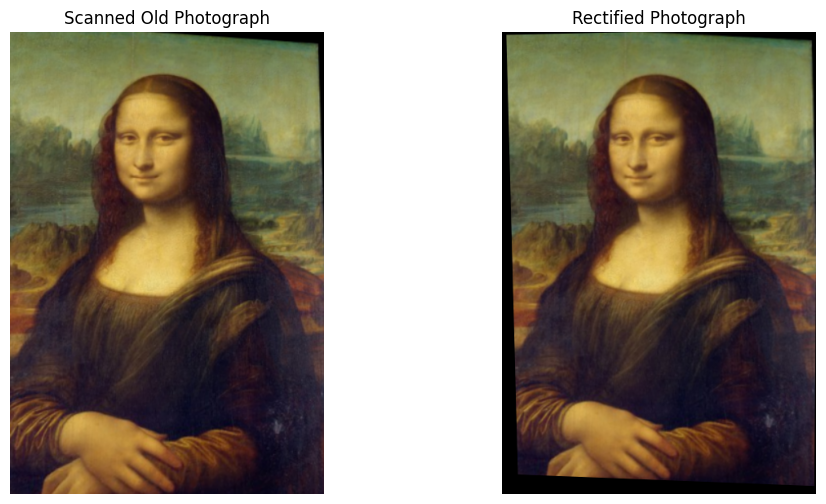

In [225]:
plt.figure(figsize=(18,6))

# Plot original distorted photo
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(distorted_photo, cv2.COLOR_BGR2RGB))
plt.title('Scanned Old Photograph')
plt.axis('off')

# Plot rectified photo
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rectified_photo_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Photograph')
plt.axis('off')

#### Challenges and Learnings
Challenges:
1. Selecting key points accurately on an old, distorted photo can be difficult due to image degradation (faded, torn, or blurred areas).
2. Aligning the old photograph with a reference image required precise control point placement to maintain proportions.

Learnings:
1. Bilinear interpolation helps in smoothly resampling pixel values, preserving the quality of the restored photograph.
2. Historical photo restoration involves not just geometric correction but also a lot of careful observation to match the old image with the reference dimensions.

### Task 5: Architectural Image Rectification

In [213]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

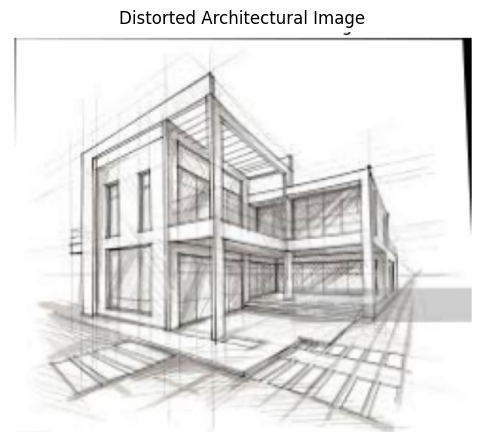

In [260]:
image_path = '/content/arch1.png'
distorted_architecture = cv2.imread(image_path)

display_image(distorted_architecture, "Distorted Architectural Image")

In [266]:
distorted_key_points = np.array([[5000, 1010], [40, 20], [40, 60], [10, 60]], dtype=np.float32)

rectified_key_points = np.array([[5000, 1005], [40, 20], [40, 60], [10, 60]], dtype=np.float32)

In [267]:
transformation_matrix = cv2.getPerspectiveTransform(distorted_key_points, rectified_key_points)
print("Transformation Matrix: \n", transformation_matrix)

Transformation Matrix: 
 [[ 1.00585146e+00  4.63656615e-03 -2.69366839e-01]
 [-1.32406949e-03  1.00839042e+00 -8.61342049e-02]
 [-2.20678249e-05  1.15914154e-04  1.00000000e+00]]


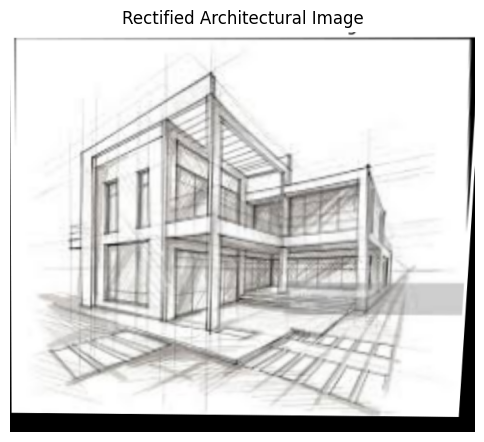

In [268]:
height, width = distorted_architecture.shape[:2]
rectified_architecture = cv2.warpPerspective(distorted_architecture, transformation_matrix, (width, height))

display_image(rectified_architecture, "Rectified Architectural Image")

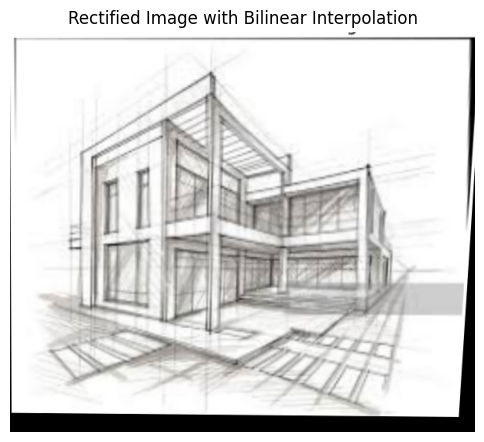

In [269]:
rectified_architecture_bilinear = cv2.warpPerspective(distorted_architecture, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)

display_image(rectified_architecture_bilinear, "Rectified Image with Bilinear Interpolation")

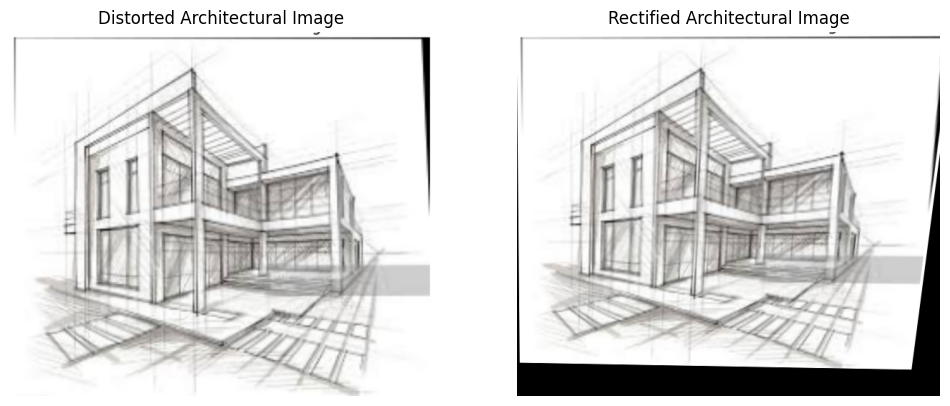

In [265]:
plt.figure(figsize=(12,6))

# Plot distorted architectural image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_architecture, cv2.COLOR_BGR2RGB))
plt.title('Distorted Architectural Image')
plt.axis('off')

# Plot rectified architectural image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_architecture_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rectified Architectural Image')
plt.axis('off')

plt.show()

#### Challenges and Learnings
"""
Challenges:
1. Accurately identifying key points on the distorted image was challenging due to the complex structure of the building.
2. Ensuring proper alignment with the known dimensions required precision in marking the points and applying the transformation.

Learnings:
1. Bilinear interpolation helps in preserving the architectural details during the rectification process, especially in straight edges.
2. Perspective distortion correction is heavily reliant on the accuracy of the control points and known dimensions of the building.
"""
